In [26]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import numpy as np

In [27]:
def otter_soc(file,nm1,nm2,lb,fo):
    
    """
    This function takes an output file for a SOC-TDDFT calculations and plots a UV-Vis\
    spectra based on given wavelength parameters, a line broadening coefficient and \
    a scaling factor to plot the oscillator strengths
    :param file: filename out output SOC-TDDFT file
    :param nm1: min. wavelength value on plot (in nm)
    :param nm2: max. wavelength value on plot (in nm)
    :param lb: line-broadening coefficient
    :param fo: coefficient to adjust height of fosc lines on plot
    :type file: string
    :type nm1: integer, float
    :type nm2: integer, float 
    :type lb: integer, float 
    :type fo: integer, float
    :return: Combined UV-Vis line plot (red) for given wavelength range and stem plot for fosc (green) 
    """
    
    abs1 = round(10000000/nm1).__str__()
    abs2 = round(10000000/nm2).__str__()
    broad = lb.__str__()
    
    
    result = subprocess.run('orca_mapspc '+file+' SOCABS -x0'+abs2+' -x1'+abs1+' -w'+broad, 
                            capture_output=True, 
                            text=True
                           )

    df = pd.read_csv(file+".2.socabs.dat",
                     delim_whitespace=True,
                     header=None,
                     names=["cm-1", "Full", "X", "Y", "Z"]
                    )

    df['nm'] = 10000000/df['cm-1']

    fig,uvv=plt.subplots()
    uvv.plot(df['nm'],
            df['Full'],
            color="red" 
            )

    # set x-axis label
    uvv.set_xlabel("Wavelength (nm)",
                  fontsize = 14
                 )

    # set y-axis label
    uvv.set_ylabel("Abs (au)",
                  color="black",
                  fontsize=14
                 )

    #set y-axes limits
    plt.ylim([0,df['Full'].max()+1000])

    #set overall x-axes range
    plt.xlim([nm1, nm2])

    
    #add in  important peaks with oscillator strengths, fosc
    with open (file, 'r') as fn:
    
        for num, line in enumerate(fn, 1): 
            if ' SOC CORRECTED ABSORPTION SPECTRUM VIA TRANSITION E' in line:
                start = num
            
            
    with open (file, 'r') as fn:    

        for num, line in enumerate(fn, 1): 
            if ' SOC CORRECTED ABSORPTION SPECTRUM VIA TRANSITION V' in line:
                end = num


    with open (file, 'r') as file:
        orca_spectrum =  [i.strip() for i in file.readlines()[start+4:end-2]]

    os2=[]

    for i in orca_spectrum: 
        h,s,t = i.partition('(')
        os2.append(h)

    os2

    os3 = [[float(x) for x in e.split()] for e in os2]

    df2=pd.DataFrame(os3)\
            .drop([0],axis=1)\
                .rename(columns={1: "State",
                                 2: "Energy (cm-1)",
                                 3: "Wavelength (nm)",
                                 4: "fosc",
                                 5: "T2 (au**2)"})

    nms = np.array(df2[df2['fosc'] >= 1e-3]['Wavelength (nm)'])
    foscs = np.array(df2[df2['fosc'] >= 1e-3]['fosc'])
    
    df3 = df2[df2['Wavelength (nm)'].between(nm1, nm2)]\

    foscs3 = np.array(df3[df3['fosc'] >= 1e-3]['fosc'])

    
    #pb3x=[818.5,406.5,362.6]
    #pb3y=[0.073586749,0.05314492,0.025626776]

    #create fsoc plot
    pb3=plt.twinx()
    pb3.stem(nms,
             foscs,
             markerfmt="C2o",
             linefmt="C2o",
             basefmt="None")
    
    pb3.set_ylabel("fosc (au)",
                  color="C2",
                  fontsize=14)

    #set y-axes for fosc 
    pb3.set_ylim(0, 
                 foscs3.max()*2*(1/fo))
    
    '''

    #set overall x-axes range

    #save as png
    #plt.savefig(fname='pb2.png', dpi=2000, format='png',bbox_inches='tight')
    '''



In [28]:
help(otter_soc)

Help on function otter_soc in module __main__:

otter_soc(file, nm1, nm2, lb, fo)
    This function takes an output file for a SOC-TDDFT calculations and plots a UV-Vis    spectra based on given wavelength parameters, a line broadening coefficient and     a scaling factor to plot the oscillator strengths
    :param file: filename out output SOC-TDDFT file
    :param nm1: min. wavelength value on plot (in nm)
    :param nm2: max. wavelength value on plot (in nm)
    :param lb: line-broadening coefficient
    :param fo: coefficient to adjust height of fosc lines on plot
    :type file: string
    :type nm1: integer, float
    :type nm2: integer, float 
    :type lb: integer, float 
    :type fo: integer, float
    :return: Combined UV-Vis line plot (red) for given wavelength range and stem plot for fosc (green)



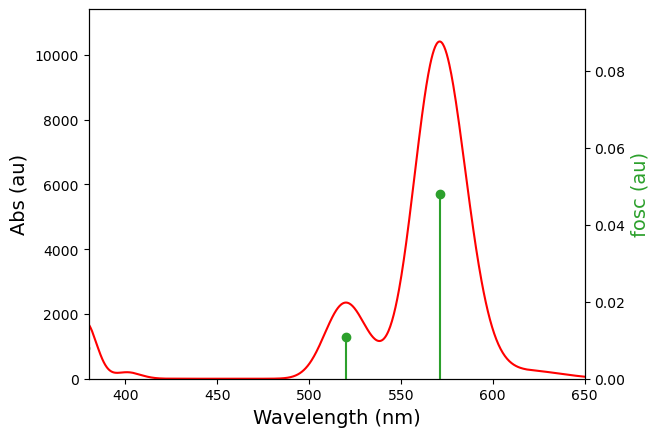

In [32]:
trythis = otter_soc("pb_al_opt1_cam_td_solv.out",380,650,1000,1)

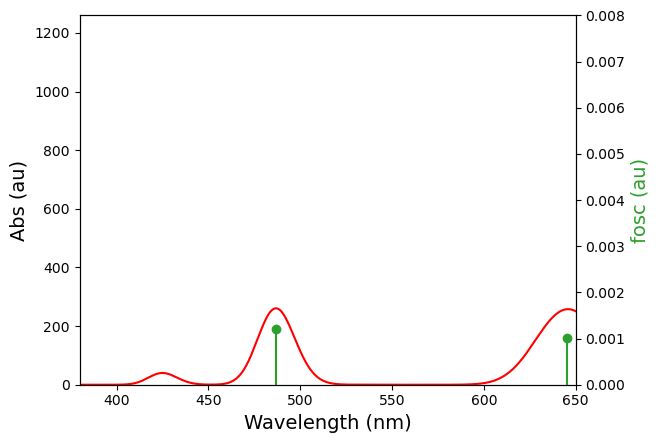

In [31]:
otter_soc("sb_al_opt1_cam_td_solv.out",380,650,1000,0.3)